# Initial plotting pyKLIP results

In [47]:

from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

import scipy.ndimage
import scipy.misc
from scipy.ndimage import rotate

import copy

import numpy as np

In [2]:
datadir = '/Users/sbetti/Documents/dissertation_datasets/final_abaur'

In [3]:
klbasis = 2 #index of the KL basis vector you want. If KLIPmodule.py has not been changed, then 
# the basis vectors are [1,2,3,4,5,10,20]. 

# OPEN FILES

### open final AB Aur images

In [4]:
kshort = fits.getdata(datadir + '/Kshort/pyklip_Kshort_k150a1s1m1_CC_alignedcenter_IWA0-KLmodes-all.fits')[klbasis,:,:]

ice2 = fits.getdata(datadir + '/H2O-Ice2/pyklip_H2O-Ice2_k150a1s1m1_CC_alignedcenter_IWA0-KLmodes-all.fits')[klbasis,:,:]

lprime = fits.getdata(datadir + '/Lprime/pyklip_Lprime_k150a1s1m1_CC_alignedcenter_IWA0-KLmodes-all.fits')[klbasis,:,:]

data_ims = [kshort, ice2, lprime]
labels = ["K$_\mathrm{s}$ 2.16 $\mu$m", "H$_2$O 3.08 $\mu$m", "L' 3.70 $\mu$m"]

### open noise/uncertainty images

In [5]:

PSFk = fits.getdata(datadir + '/Kshort/pyklip_Kshort_k150a1s1m1_CC_alignedcenter_HIP24447_maskedIWA0-KLmodes-all.fits')[klbasis,:,:]

PSFice2 = fits.getdata(datadir + '/H2O-Ice2/pyklip_H2O-Ice2_k150a1s1m1_CC_alignedcenter_HIP24447_IWA0-KLmodes-all.fits')[klbasis,:,:]

PSFl = fits.getdata(datadir + '/Lprime/pyklip_Lprime_k150a1s1m1_CC_alignedcenter_HD39925_IWA0-KLmodes-all.fits')[klbasis,:,:]

psf_ims = [PSFk, PSFice2, PSFl]

### open unsaturated median stacked images

In [6]:
#unsaturated median images
unsatdir = '/Users/sbetti/Documents/dissertation_datasets/LMIRCam_normal/unsats/AB-Aur/'

unsat_k = fits.getdata(unsatdir + 'median_k.fits')
unsat_ice2 = fits.getdata(unsatdir + 'median_ice2.fits')
unsat_l = fits.getdata(unsatdir + 'median_l.fits')

unsat_ims = [unsat_k, unsat_ice2, unsat_l]


# Get radial grid

In [7]:
gridx, gridy = np.meshgrid(np.arange(data_ims[0].shape[0]), np.arange(data_ims[0].shape[1]))
gridx -= 125
gridy -= 125
rr_pix = np.hypot(gridx, gridy)
rr_asec = np.hypot(gridx, gridy) * 0.022

In [32]:
def plot_axes(axes, circ=True):
    if not isinstance(axes, list):
        axes = [axes]
    for ax in axes:
        ax.plot([1.5, 0.886], [-1.3, -1.3], linewidth=3, color='white')
        ax.text(1.35, -1.22, '0.6"', fontsize=10, color='white')
        ax.text(1.5, -1.55, '100 AU', fontsize=10, color='white')
        ax.set_xlim(1.7,-1.7)
        ax.set_ylim(-1.7,1.7)
        
        ax.tick_params(which='major', direction='in', size=7, color='k', width=2, labelsize=16)
        ax.tick_params(which='minor', direction='in', size=5, color='k', width=2, labelsize=16)
        ax.minorticks_on()
        
        if circ:
            c = plt.Circle((0,0), 0.154, color='k')
            ax.add_artist(c)
      
        ax.plot([-1.5, -1.2], [-1.55, -1.55], linewidth=2, color='white')
        ax.plot([-1.5, -1.5], [-1.55, -1.25], linewidth=2, color='white')
        ax.text(-1.5, -1.2, 'N', color='white', fontsize=10, ha='center')
        ax.text(-1.08, -1.6, 'E', color='white', fontsize=10, ha='center')

# Plot to match Hashimoto

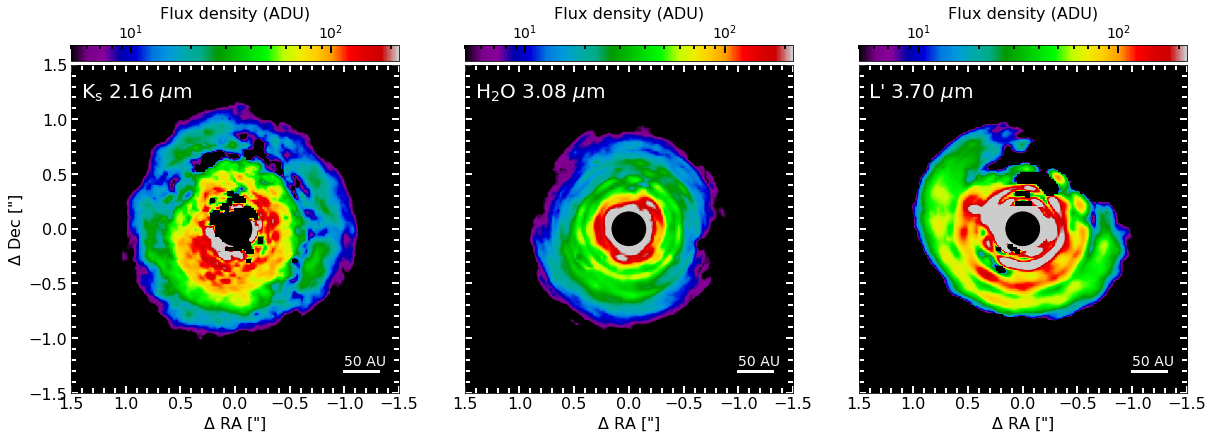

In [17]:
cmap = copy.copy(matplotlib.cm.get_cmap("nipy_spectral"))
cmap.set_bad('black')

pix_scale = 0.022
halfsize = np.asarray(data_ims[0].shape[-2:]) / 2 * pix_scale
extent = [halfsize[0], -halfsize[0], -halfsize[1], halfsize[1]]

fig, axes = plt.subplots(figsize=(20,8), nrows=1, ncols=len(data_ims), sharex=True, sharey=True)
for i in np.arange(len(data_ims)):
    im=axes[i].imshow(data_ims[i], origin='lower', cmap=cmap, 
                      extent=extent,norm=LogNorm(vmin=5, vmax=220))
    c = plt.Circle((0,0), 0.154, color='k')
    axes[i].add_artist(c)
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes("top", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax, orientation='horizontal')
    cb.set_label('Flux density (ADU)', fontsize=16)
    plt.sca(axes[i]) # we reset the main axis
    cb.ax.xaxis.set_label_position('top')    
    cb.ax.xaxis.tick_top()
    cb.ax.tick_params(which='major', labelsize=14, size=8, direction='in', width=2, top=True)
    cb.ax.tick_params(which='minor', labelsize=14, size=4, direction='in', width=2, top=True)
    axes[i].text(0.03, 0.9, labels[i], color='white', fontsize=20, transform=axes[i].transAxes)
    
    axes[i].plot([-1, -1.307], [-1.3, -1.3], linewidth=3, color='white')
    axes[i].text(-1., -1.25, '50 AU', fontsize=14, color='white')
    axes[i].set_xlim(1.5,-1.5)
    axes[i].set_ylim(-1.5,1.5)
    axes[i].set_xlabel('$\Delta$ RA ["]', fontsize=16)
    if i == 0:
        axes[i].set_ylabel('$\Delta$ Dec ["]', fontsize=16)
    axes[i].tick_params(which='major', direction='in', size=7, color='white', width=2, labelsize=16)
    axes[i].tick_params(which='minor', direction='in', size=5, color='white', width=2, labelsize=16)
    axes[i].minorticks_on()
plt.show()

# Paper plot

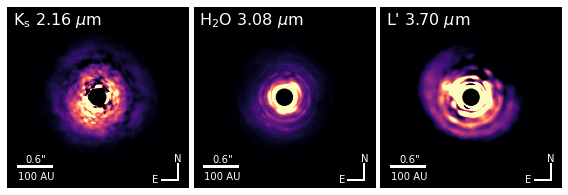

In [36]:
cmap = copy.copy(matplotlib.cm.get_cmap("magma"))
cmap.set_bad('black')

pix_scale = 0.022
halfsize = np.asarray(data_ims[0].shape[-2:]) / 2 * pix_scale
extent = [halfsize[0], -halfsize[0], -halfsize[1], halfsize[1]]

fig, axes = plt.subplots(figsize=(8,4), nrows=1, ncols=len(data_ims), sharex=True, sharey=True)
for i in np.arange(len(data_ims)):
    im=axes[i].imshow(data_ims[i], origin='lower', cmap=cmap, 
                      extent=extent,vmin=0, vmax=150)
    axes[i].text(0.03, 0.9, labels[i], color='white', fontsize=16, transform=axes[i].transAxes)
    axes[i].axis('off')
    plot_axes(axes[i])
plt.tight_layout()
plt.subplots_adjust(wspace=0.03)
# plt.savefig('/Users/sbetti/Desktop/all3_V2.pdf', dpi=150, transparent=True)
plt.show()


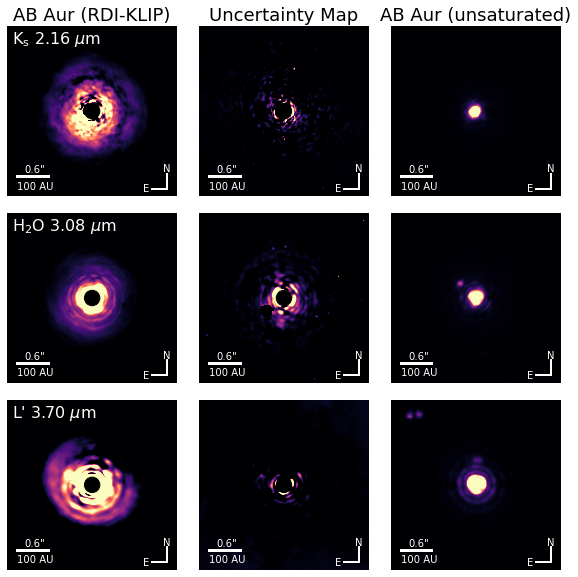

In [31]:
cmap = copy.copy(matplotlib.cm.get_cmap("magma"))
cmap.set_bad('black')

fig, axes = plt.subplots(figsize=(10,10), nrows=3, ncols=len(data_ims), sharex=True, sharey=True,)

for i in np.arange(len(data_ims)):
    im=axes[i,0].imshow(data_ims[i], origin='lower', cmap=cmap, 
                      extent=extent,vmin=0, vmax=120)
    axes[i,0].text(0.03, 0.9, labels[i], color='white', fontsize=16, transform=axes[i,0].transAxes)
    axes[i,0].axis('off')
    
    im=axes[i,1].imshow(psf_ims[i], origin='lower', cmap=cmap, 
                        extent=extent,vmin=0, vmax=120)
    axes[i,1].axis('off')
    
    im=axes[i,2].imshow(unsat_ims[i], origin='lower', cmap=cmap, 
                        extent=extent,vmin=0, vmax=120)
    axes[i,2].axis('off')

    plot_axes([axes[i,0], axes[i,1]])
    plot_axes(axes[i,2], circ=False)
    
axes[0,0].set_title('AB Aur (RDI-KLIP)',fontsize=18)
axes[0,1].set_title('Uncertainty Map',fontsize=18)
axes[0,2].set_title('AB Aur (unsaturated)',fontsize=18)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig('/Users/sbetti/Desktop/all3_r2.png', dpi=150, transparent=True)
plt.show()



# Radial Profiles

In [37]:
def az_profiles_circle(data, N, r1, r2):  
    mask = np.zeros_like(data, dtype=bool)
    mask[np.isnan(data)] = False
    kshort_nonan = np.nan_to_num(data)
  
    xx = data.shape[1]
    yy = data.shape[0]
    y,x = np.mgrid[:yy,:xx]
    circle1 =  (x-(xx/2.))**2. + (y-(yy/2.))**2. <= r1**2.
    circle2 =  (x-(xx/2.))**2. + (y-(yy/2.))**2 <= r2**2.
    circle = np.logical_xor(circle1, circle2)
    mask[circle] = True
    
    N_nonan = np.nan_to_num(N)
    maskN = np.zeros_like(N, dtype=bool)
    maskN[np.isnan(N)] = False
    xxN = N.shape[1]
    yyN = N.shape[0]
    yN,xN = np.mgrid[:yyN,:xxN]
    circleN1 =  (xN-(xxN/2.))**2. + (yN-(yyN/2.))**2. <= r1**2.
    circleN2 =  (xN-(xxN/2.))**2. + (yN-(yyN/2.))**2 <= r2**2.
    circleN = np.logical_xor(circleN1, circleN2)
    maskN[circleN] = True
    
    x,y = image_tools.radialprofile.radialAverage(kshort_nonan, mask=mask, returnAz=True,  binsize=5, interpnan=True)
    xerr, yerr = image_tools.radialprofile.radialAverage(N_nonan, mask=maskN, stddev=True,returnAz=True,  binsize=5, interpnan=True)
    
    y = y[::-1]
    yerr = yerr[::-1]
    return x, y, yerr


def radial_profile(data, N, theta, WW=4, arcdistance=1.4):
    
    DATA = np.nan_to_num(data)
    disk_rot = rotate(DATA, theta, reshape=False) 
    N_rot = rotate(N, theta,reshape=False)
    xx = data.shape[1]
    yy = data.shape[0]
    
    YYmin = int((yy/2) - arcdistance/0.022)
    YYmax = int((yy/2) + arcdistance/0.022)
    
    sli =  disk_rot[YYmin:YYmax, int((xx/2.)-WW/2):int((xx/2.)+WW/2)]
    sliN = N_rot[YYmin:YYmax, int((xx/2.)-WW/2):int((xx/2.)+WW/2)]
    
    Xvals = ((np.arange(-len(sli)/2,len(sli)/2)) * 0.022)[::-1] * 162.9
    Xarr = (np.ones_like(sli).T * Xvals).T

    Xbins = binning_2d(Xarr, WW)
    Ybins = binning_2d(sli, WW)
    Yerrbins = binning_2d(sli, WW, yerr=True)
    
    ind = np.where(abs(Xbins) < 25)
    Xbins[ind] = np.nan
    Ybins[ind] = np.nan
    Yerrbins[ind]=np.nan
    
    mask = np.zeros_like(disk_rot) 
    mask[YYmin:YYmax, int((xx/2.)-WW/2):int((xx/2.)+WW/2)] = 2
    mask_back = rotate(mask, -theta, reshape=False) 
    
    return mask_back, Xbins, Ybins, Yerrbins
   
def az_radial_profile(data, center):

    x,y = image_tools.radialprofile.azimuthalAverage(data, stddev=False, returnradii=True, 
                                    binsize=3,interpnan=True)
    x,yerr = image_tools.radialprofile.azimuthalAverage(data, stddev=True, returnradii=True, 
                                binsize=3,interpnan=True)
    return x*0.022*162.9, y, yerr


In [38]:

def binning_2d(x, WW, yerr=False):
    Xshape = x.shape[1]
    Yshape = x.shape[0]
    if Xshape % WW != 0:
        padX = Xshape + (WW - Xshape%WW) 
    else:
        padX = Xshape
    if Yshape % WW != 0:
        padY = Yshape + (WW-Yshape%WW)
    else:
        padY = Yshape
    pad_arr = np.ones((padY, padX)) * np.nan
    pad_arr[:Yshape, :Xshape] = x
    
    if yerr:
        binned = np.nanstd(np.nanstd(pad_arr.reshape(len(pad_arr)//WW, WW, 1, WW), axis=3), axis=1)
    else:
    
        binned = np.nanmedian(np.nanmedian(pad_arr.reshape(len(pad_arr)//WW, WW, 1, WW), axis=3), axis=1)
    
    return binned.T[0]


def radial_profile_PA(data, psf_data, theta, peak_unsat_star, peak_unsat_psf, exptime_star, 
                      exptime_psf, exptime_unsat_star, exptime_unsat_psf):
    DATA = np.nan_to_num(data)
    psfdata = np.nan_to_num(psf_data)
    
    # convert to contrast units
    ratio_star = exptime_unsat_star / (peak_unsat_star * exptime_star)
    ratio_psf = exptime_unsat_psf / (peak_unsat_psf * exptime_psf)
    DATA = DATA * ratio_star
    psfdata = psfdata * ratio_psf
    
    # rotate 
    disk_rot = rotate(DATA, theta, reshape=False) 
    disk_rot_psf = rotate(psfdata, theta, reshape=False) 
    
    gridx, gridy = np.meshgrid(np.arange(DATA.shape[0]), np.arange(DATA.shape[1]))
    gridx -= 125
    gridy -= 125
    rr = (np.hypot(gridx, gridy) * 0.022)
    
    # box size
    WW = 5
    arcdistance=1.4
    YYmin = int(125 - arcdistance/0.022)
    YYmax = int(125 + arcdistance/0.022)

    # pull radial slice, and disk slice
    sli_rr = rr[YYmin:YYmax, int(125-WW/2):int(125+WW/2)] 
    sli =  disk_rot[YYmin:YYmax, int(125-WW/2):int(125+WW/2)]
    sli_psf =  disk_rot_psf[YYmin:YYmax, int(125-WW/2):int(125+WW/2)]

    Xvals = ((np.arange(-len(sli)/2,len(sli)/2)) * 0.022)[::-1] * 162.9
    Xarr = (np.ones_like(sli).T * Xvals).T
    
    RR = binning_2d(sli_rr,WW)
    Ybins = binning_2d(sli, WW)  /1e-5* RR**2.
    Yerrbins = binning_2d(sli_psf, WW, yerr=True) /1e-5* RR**2.
    Xbins = binning_2d(Xarr, WW)
    
    ind = np.where(abs(Xbins) < 14)
    Xbins[ind] = np.nan
    Yerrbins[ind] = np.nan
    Ybins[ind] = np.nan
    
    return Xbins, Ybins, Yerrbins



In [42]:
theta = -126 ## major
WW = 5
arcdistance=1.4

peak_unsat_star_k, peak_unsat_psf_hip24447_k = 2445.92, 5606.59
exptime_star_k, exptime_psf_hip24447_k = 2, 2
exptime_unsat_star_k, exptime_unsat_psf_hip24447_k = 0.015, 0.015
KX, KY, KYerr = radial_profile_PA(kshort, PSFk, theta, peak_unsat_star_k, peak_unsat_psf_hip24447_k, 
                                                exptime_star_k, exptime_psf_hip24447_k, 
                                                exptime_unsat_star_k, exptime_unsat_psf_hip24447_k)

peak_unsat_star_ice2, peak_unsat_psf_hip24447_ice2 = 3207.67, 2490.75
exptime_star_ice2, exptime_psf_hip24447_ice2 = 2, 2
exptime_unsat_star_ice2, exptime_unsat_psf_hip24447_ice2 = 0.058, 0.058
IX, IY, IYerr = radial_profile_PA(ice2, PSFice2, theta, peak_unsat_star_ice2, peak_unsat_psf_hip24447_ice2, 
                                                exptime_star_ice2, exptime_psf_hip24447_ice2, 
                                                exptime_unsat_star_ice2, exptime_unsat_psf_hip24447_ice2)

peak_unsat_star_l = 8430.98 
exptime_star_l = 0.875
exptime_unsat_star_l = 1.45/8
LX, LY, LYerr = radial_profile_PA(lprime, PSFl, theta, peak_unsat_star_l, peak_unsat_star_l, 
                                                exptime_star_l, exptime_unsat_star_l, 
                                                exptime_unsat_star_l, exptime_unsat_star_l)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


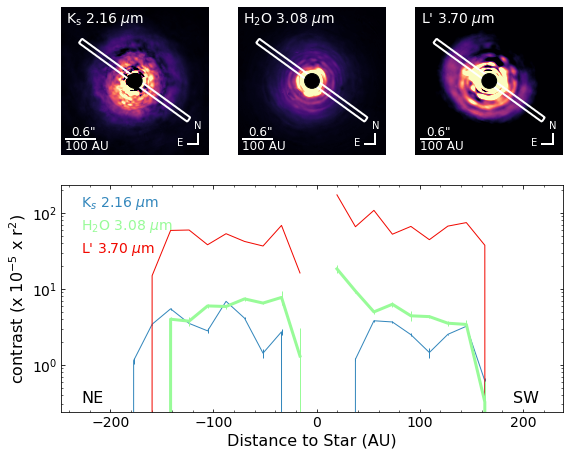

In [49]:


cmap = copy.copy(matplotlib.cm.get_cmap("magma"))
cmap.set_bad('black')

c3=matplotlib.cm.jet(0.9)
c2='palegreen'
c1 =matplotlib.cm.Spectral(.9)

fig = plt.figure(figsize=(9,8))
gs = GridSpec(2,3, width_ratios=[4,4,4], height_ratios=[10,11], hspace=0)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,:])

kshort_R = rotate(np.nan_to_num(kshort), theta, reshape=False) 
ice2_R = rotate(np.nan_to_num(ice2), theta, reshape=False) 
lprime_R = rotate(np.nan_to_num(lprime), theta, reshape=False) 


color = [c1, c2, c3]
im_R = [kshort_R, ice2_R, lprime_R]
im_O = [kshort, ice2, lprime]

YYmin = int(125 - arcdistance/0.022)
YYmax = int(125 + arcdistance/0.022)

for i, ax in enumerate([ax1, ax2, ax3]):
    mask = np.zeros_like(kshort_R)
    
    mask[YYmin:YYmax, int(125-WW/2):int(125+WW/2)] = 2

    disk_rot_back = rotate(im_R[i], -theta, reshape=False) 
    mask_back = rotate(mask, -theta, reshape=False) 
    vmin, vmax =interval.get_limits(im_O[i])        
    im=ax.imshow(im_O[i], vmin=-10, vmax=150, cmap='magma')

    ax.contour(mask_back,levels=[1], colors='white', origin='lower', linewidths=2)
    c = plt.Circle((125,125), 7, color='k', zorder=10)
    ax.add_artist(c)
    ax.set_xlim(125-70, 125+70)
    ax.set_ylim(125-70, 125+70)
    ax.axis('off')
    ax.plot([60, 87.273], [70, 70], linewidth=2, color='white')
    ax.text(65, 73, '0.6"', fontsize=12, color='white')
    ax.text(59, 60, '100 AU', fontsize=12, color='white')

    ax.plot([175, 185], [65, 65], linewidth=2, color='white')
    ax.plot([185, 185], [65, 75], linewidth=2, color='white')
    ax.text(185, 80, 'N', color='white', fontsize=10, ha='center')
    ax.text(168, 63, 'E', color='white', fontsize=10, ha='center')


    ax.text(60,180, labels[i], color='white', fontsize=14)

    
ax4.errorbar(KX, KY, yerr=KYerr, fmt='-', color=c1, ecolor=c1,
             markerfacecolor='none', linewidth=1, elinewidth=1)
ax4.errorbar(IX, IY, yerr=IYerr, fmt='-', color=c2, ecolor=c2
             ,markerfacecolor='none', linewidth=3,elinewidth=1, zorder=10)
ax4.errorbar(LX, LY, yerr=np.zeros_like(LY), fmt='-', color=c3,
             markerfacecolor='none', linewidth=1)


for ax in [ax4]:
    ax.text(0.04, 0.9, "K$_s$ 2.16 $\mu$m", color=c1,transform=ax.transAxes, fontsize=14, zorder=10) 
    ax.text(0.04, 0.8, "H$_2$O 3.08 $\mu$m", color=c2,transform=ax.transAxes, fontsize=14, zorder=10) 
    ax.text(0.04, 0.7, "L' 3.70 $\mu$m", color=c3,transform=ax.transAxes, fontsize=14, zorder=10) 
    ax.text(0.04, 0.04, 'NE', color='k', transform=ax.transAxes, fontsize=16)
    ax.text(0.9, 0.04, 'SW', color='k', transform=ax.transAxes, fontsize=16)
    ax.tick_params(which='both', direction='in', right=True, top=True, labelsize=14)
    plt.minorticks_on()
    ax.axhline(0, color='k', alpha=0.8)
    ax.set_ylabel(r'contrast (x 10$^{-5}$ x r$^2$)', fontsize=16)
    ax.set_xlabel('Distance to Star (AU)', fontsize=16)
    ax.set_yscale('log')

    
# plt.savefig('/Users/sbetti/Desktop/radial_profile_contrast.png', dpi=150, transparent=True)
plt.show()

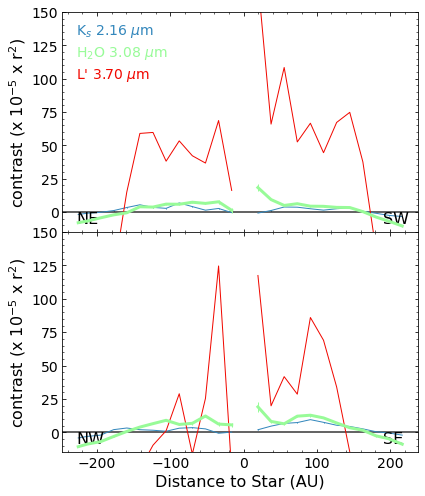

In [51]:
WW = 5
arcdistance = 1.4
theta = [-126, -36] ## major, minor

fig, (ax1, ax2) = plt.subplots(figsize=(6,7),nrows=2, ncols=1, sharex=True)
ax = [ax1, ax2]

cmap = matplotlib.cm.get_cmap('Spectral')
c3=matplotlib.cm.jet(0.9)
c2='palegreen'
c1 =cmap(.9)

for i in np.arange(2):

    peak_unsat_star_k, peak_unsat_psf_hip24447_k = 2445.92, 5606.59
    exptime_star_k, exptime_psf_hip24447_k = 2, 2
    exptime_unsat_star_k, exptime_unsat_psf_hip24447_k = 0.015, 0.015
    KX, KY, KYerr = radial_profile_PA(kshort, PSFk, theta[i], peak_unsat_star_k, peak_unsat_psf_hip24447_k, 
                                                    exptime_star_k, exptime_psf_hip24447_k, 
                                                    exptime_unsat_star_k, exptime_unsat_psf_hip24447_k)

    peak_unsat_star_ice2, peak_unsat_psf_hip24447_ice2 = 3207.67, 2490.75
    exptime_star_ice2, exptime_psf_hip24447_ice2 = 2, 2
    exptime_unsat_star_ice2, exptime_unsat_psf_hip24447_ice2 = 0.058, 0.058
    IX, IY, IYerr = radial_profile_PA(ice2, PSFice2, theta[i], peak_unsat_star_ice2, peak_unsat_psf_hip24447_ice2, 
                                                    exptime_star_ice2, exptime_psf_hip24447_ice2, 
                                                    exptime_unsat_star_ice2, exptime_unsat_psf_hip24447_ice2)

    peak_unsat_star_l = 8430.98 
    exptime_star_l = 0.875
    exptime_unsat_star_l = 1.45/8
    LX, LY, LYerr = radial_profile_PA(lprime, PSFl, theta[i], peak_unsat_star_l, peak_unsat_star_l, 
                                                    exptime_star_l, exptime_unsat_star_l, 
                                                    exptime_unsat_star_l, exptime_unsat_star_l)

    ax[i].errorbar(KX, KY, yerr=KYerr, fmt='-', capsize=0, color=c1, ecolor=c1,
                 markerfacecolor='none',label="K$_s$ 2.16$\mu$m", linewidth=1, elinewidth=1)
    ax[i].errorbar(IX, IY, yerr=IYerr, fmt='-', capsize=0, color=c2, ecolor=c2
                 ,markerfacecolor='none', label="H$_2$O 3.08$\mu$m", linewidth=3,elinewidth=1, zorder=10)
    ax[i].errorbar(LX, LY, yerr=np.zeros_like(LY), fmt='-', color=c3,
                 markerfacecolor='none', label="L' 3.31$\mu$m",linewidth=1,capsize=0)

    
    ax[i].tick_params(which='both', direction='in', right=True, top=True, labelsize=14)
    
    ax[i].axhline(0, color='k', alpha=0.8)
    ax[i].set_ylabel(r'contrast (x 10$^{-5}$ x r$^2$)', fontsize=16)
    ax[i].set_ylim(-15, 150)

ax2.set_xlabel('Distance to Star (AU)', fontsize=16)
    
ax1.text(0.04, 0.9, "K$_s$ 2.16 $\mu$m", color=c1,transform=ax1.transAxes, fontsize=14, zorder=10) 
ax1.text(0.04, 0.8, "H$_2$O 3.08 $\mu$m", color=c2,transform=ax1.transAxes, fontsize=14, zorder=10) 
ax1.text(0.04, 0.7, "L' 3.70 $\mu$m", color=c3,transform=ax1.transAxes, fontsize=14, zorder=10) 

ax1.text(0.04, 0.04, 'NE', color='k', transform=ax1.transAxes, fontsize=16) # major
ax1.text(0.9, 0.04, 'SW', color='k', transform=ax1.transAxes, fontsize=16)  # major

ax2.text(0.04, 0.04, 'NW', color='k', transform=ax2.transAxes, fontsize=16) #minor
ax2.text(0.9, 0.04, 'SE', color='k', transform=ax2.transAxes, fontsize=16)  #minor 
plt.minorticks_on()
plt.tight_layout()
plt.subplots_adjust(hspace=0, left=0.15)
# plt.savefig('/Users/sbetti/Desktop/radial_profile_contrast.pdf', dpi=150, transparent=True)
plt.show()